In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Convolutions and basics of CNNs

> How convolutions work

In [2]:
from exp.nb_07 import *
from PIL import Image
import numpy as np

## Convolution

__Resources__

- https://brohrer.github.io/how_convolutional_neural_networks_work.html
- http://www.cs.cornell.edu/courses/cs1114/2013sp/sections/S06_convolution.pdf
- https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
- https://openframeworks.cc/ofBook/chapters/image_processing_computer_vision.html
- https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c

Images are generally loaded as `[width,  height,  channels]`.

Pytorch expects them to be `[batch size, channels, height, width]` so we'll reshape using `view`

Then we can pass it into our `nn.Conv2d` with a filter and if the `stride=1` which returns a rank 3 tensor `[filters, channels, weight, height, width]'

In [3]:
img = Image.open("imgs/sils.jpeg")

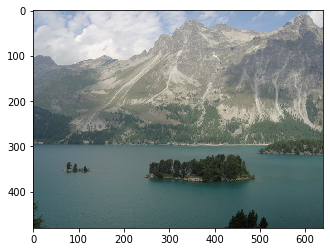

In [4]:
plt.imshow(img)

In [5]:
img_np = np.array(img)

In [6]:
img_tensor = tensor(img_np, dtype=torch.float).view(1, 3, 480, -1); img_tensor.shape

torch.Size([1, 3, 480, 640])

In [7]:
kernel = torch.randn((1,3,3,3)); kernel.shape

torch.Size([1, 3, 3, 3])

In [8]:
feature_map = F.conv2d(img_tensor, kernel, padding=1); feature_map.shape

torch.Size([1, 1, 480, 640])

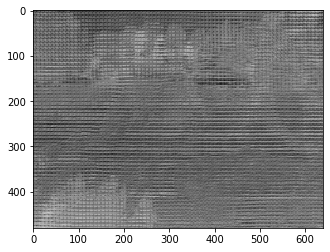

In [9]:
plt.imshow(feature_map.squeeze());

### Adaptive Average Max Pool

`F.adaptive_avg_pool2d`

    Applies a 2D adaptive average pooling over an input signal composed of several input planes.

In [10]:
avg_pool_1d = F.adaptive_avg_pool2d(feature_map, 1); avg_pool_1d.shape

torch.Size([1, 1, 1, 1])

In [11]:
feature_map.squeeze().view(-1).mean()

tensor(-393.6824)

In [12]:
avg_pool_1d.squeeze()

tensor(-393.6824)

### Adaptive Max Pool

F.adaptive_max_pool2d

    Applies a 2D adaptive max pooling over an input signal composed of several input planes.
    
Max pooling will return a tensor of the max of some specified shape. 

In [13]:
max_pool = F.adaptive_max_pool2d(feature_map, 1); max_pool.shape

torch.Size([1, 1, 1, 1])

In [14]:
feature_map.squeeze().view(-1).max()

tensor(405.4677)

In [15]:
max_pool.squeeze()

tensor(405.4677)

## Pre-Trained Model

Let's look at the activations of a pretrained model. 

In [16]:
from fastai.vision import *

In [17]:
model = models.resnet34(pretrained=True)

To pass an image we need to: normalize, turn into a mini-batch, and put onto GPU